In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [24]:
df = pd.read_csv('/content/traffic_congestion.csv')
df.columns = df.columns.str.strip()

In [25]:
# === Encode Categorical Columns ===
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [26]:
X = df.drop('congestion_level', axis=1)
y = df['congestion_level']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoders['congestion_level'].classes_))


Accuracy: 0.35

Classification Report:
               precision    recall  f1-score   support

        high       0.00      0.00      0.00         4
         low       0.38      0.43      0.40         7
      medium       0.50      0.44      0.47         9

    accuracy                           0.35        20
   macro avg       0.29      0.29      0.29        20
weighted avg       0.36      0.35      0.35        20



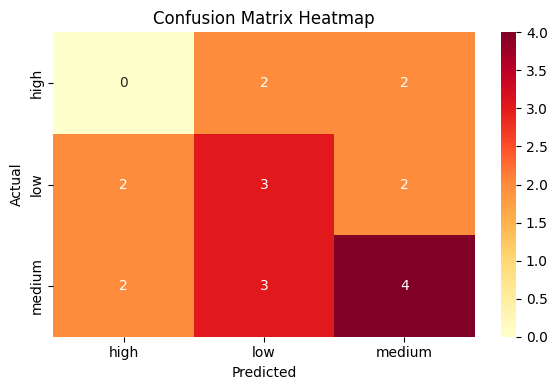

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=label_encoders['congestion_level'].classes_,
            yticklabels=label_encoders['congestion_level'].classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [31]:
features_for_clustering = ['vehicle_count', 'avg_speed']
features_for_clustering = [col for col in features_for_clustering if col in df.columns]


In [36]:
if len(features_for_clustering) == 2:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features_for_clustering])

    # Apply KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)

    # Scatter plot for clusters
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df['vehicle_count'], y=df['avg_speed'], hue=df['cluster'], palette='viridis')
    plt.title("Traffic Pattern Clustering")
    plt.xlabel("Vehicle Count")
    plt.ylabel("Average Speed")
    plt.tight_layout()
    plt.show()
else:
    print(f"Clustering skipped: Required columns not found in dataset: {features_for_clustering}")

Clustering skipped: Required columns not found in dataset: ['avg_speed']
